In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

In [ ]:

df_cross_yolo = pd.read_csv('var3_NA_statistics_cross.csv')
df_len_yolo = pd.read_csv('var3_NA_statistics_length.csv')
cross_sections_yolo = df_cross_yolo['Cross section [nm^2]'].dropna().values
lengths_yolo = df_len_yolo['Length [nm]'].dropna().values

df_cross_unet = pd.read_csv('unet_var3_NA_statistics_cross.csv')
df_len_unet = pd.read_csv('unet_var3_NA_statistics_length.csv')
cross_sections_unet = df_cross_unet['Cross section [nm^2]'].dropna().values
lengths_unet = df_len_unet['Length [nm]'].dropna().values

df_cross_mask = pd.read_csv('mask_var3_NA_statistics_cross.csv')
df_len_mask = pd.read_csv('mask_var3_NA_statistics_length.csv')
cross_sections_mask = df_cross_mask['Cross section [nm^2]'].dropna().values
lengths_mask = df_len_mask['Length [nm]'].dropna().values

file_path = "var3_NA_cross.csv"
data = pd.read_csv(file_path, header=None, engine='python', names=['integer', 'decimal'], sep=',')
# Fill missing decimal values with 0
data['decimal'] = data['decimal'].fillna(0)

# Combine the integer and decimal parts
data_combined = data['integer'] + data['decimal'] / (10 ** data['decimal'].astype(str).str.len())
number_list = data_combined.tolist()
hist_numbers = np.array(number_list)

file_path_length = "var3_NA_length.csv"
data_l = pd.read_csv(file_path_length, header=None, engine='python', names=['integer', 'decimal'], sep=',')
# Fill missing decimal values with 0
data_l['decimal'] = data_l['decimal'].fillna(0)

# Combine the integer and decimal parts
data_combined_l = data_l['integer'] + data_l['decimal'] / (10 ** data_l['decimal'].astype(str).str.len())
number_list_l = data_combined_l.tolist()
hist_numbers_l = np.array(number_list_l)


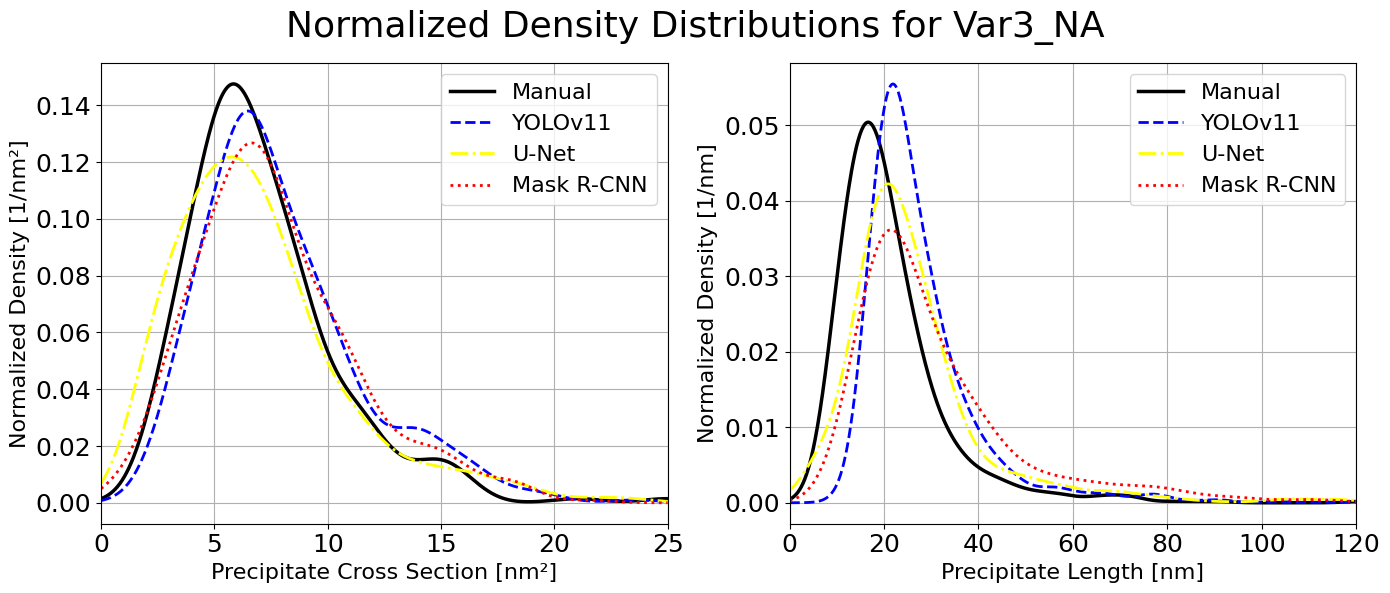

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde


kde_manual_cross = gaussian_kde(hist_numbers)
kde_yolo_cross = gaussian_kde(cross_sections_yolo)
kde_unet_cross = gaussian_kde(cross_sections_unet)
kde_mask_cross = gaussian_kde(cross_sections_mask)


kde_manual_length = gaussian_kde(hist_numbers_l) 
kde_yolo_length = gaussian_kde(lengths_yolo)
kde_unet_length = gaussian_kde(lengths_unet)
kde_mask_length = gaussian_kde(lengths_mask)

# Define common x-ranges
x_min_cross = 0
x_max_cross = max(
    np.max(hist_numbers),
    np.max(cross_sections_yolo),
    np.max(cross_sections_unet),
    np.max(cross_sections_mask)
)
x_vals_cross = np.linspace(x_min_cross, x_max_cross, 1000)

x_min_len = 0
x_max_len = max(
    np.max(lengths_yolo),
    np.max(lengths_unet),
    np.max(lengths_mask)
)
x_vals_len = np.linspace(x_min_len, x_max_len, 1000)

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

fig.suptitle("Normalized Density Distributions for Var3_NA", fontsize=26)

axs[0].plot(x_vals_cross, kde_manual_cross(x_vals_cross), label="Manual", color="black", linewidth=2.5)
axs[0].plot(x_vals_cross, kde_yolo_cross(x_vals_cross), label="YOLOv11", color="blue", linestyle='--', linewidth=2)
axs[0].plot(x_vals_cross, kde_unet_cross(x_vals_cross), label="U-Net", color="yellow", linestyle='-.', linewidth=2)
axs[0].plot(x_vals_cross, kde_mask_cross(x_vals_cross), label="Mask R-CNN", color="red", linestyle=':', linewidth=2)

axs[0].set_xlabel("Precipitate Cross Section [nm²]", fontsize=16)
axs[0].set_ylabel("Normalized Density [1/nm²]", fontsize=16)
axs[0].legend(fontsize=12)
axs[0].grid(True)
axs[0].tick_params(axis='both', labelsize=18)
axs[0].set_xlim(x_min_cross, x_max_cross)
axs[0].legend(fontsize=16)


axs[1].plot(x_vals_len, kde_manual_length(x_vals_len), label="Manual", color="black", linewidth=2.5)
axs[1].plot(x_vals_len, kde_yolo_length(x_vals_len), label="YOLOv11", color="blue", linestyle='--', linewidth=2)
axs[1].plot(x_vals_len, kde_unet_length(x_vals_len), label="U-Net", color="yellow", linestyle='-.', linewidth=2)
axs[1].plot(x_vals_len, kde_mask_length(x_vals_len), label="Mask R-CNN", color="red", linestyle=':', linewidth=2)

axs[1].set_xlabel("Precipitate Length [nm]", fontsize=16)
axs[1].set_ylabel("Normalized Density [1/nm]", fontsize=16)
axs[1].legend(fontsize=12)
axs[1].grid(True)
axs[1].tick_params(axis='both', labelsize=18)
axs[1].set_xlim(x_min_len, 120)
axs[1].legend(fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 1])  
plt.show()


Mean:  7.130949606076692
Std:  3.2760336090351494
Mean:  21.57158974184698
Std:  12.68897247509504
Mean:  6.483896911522935
Std:  2.223312719454257
Mean:  11.772589081482485
Std:  4.059175414216625
Mean:  4.026759227445322
Std:  1.881090161863324
Mean:  16.159902911910827
Std:  9.133530307017617


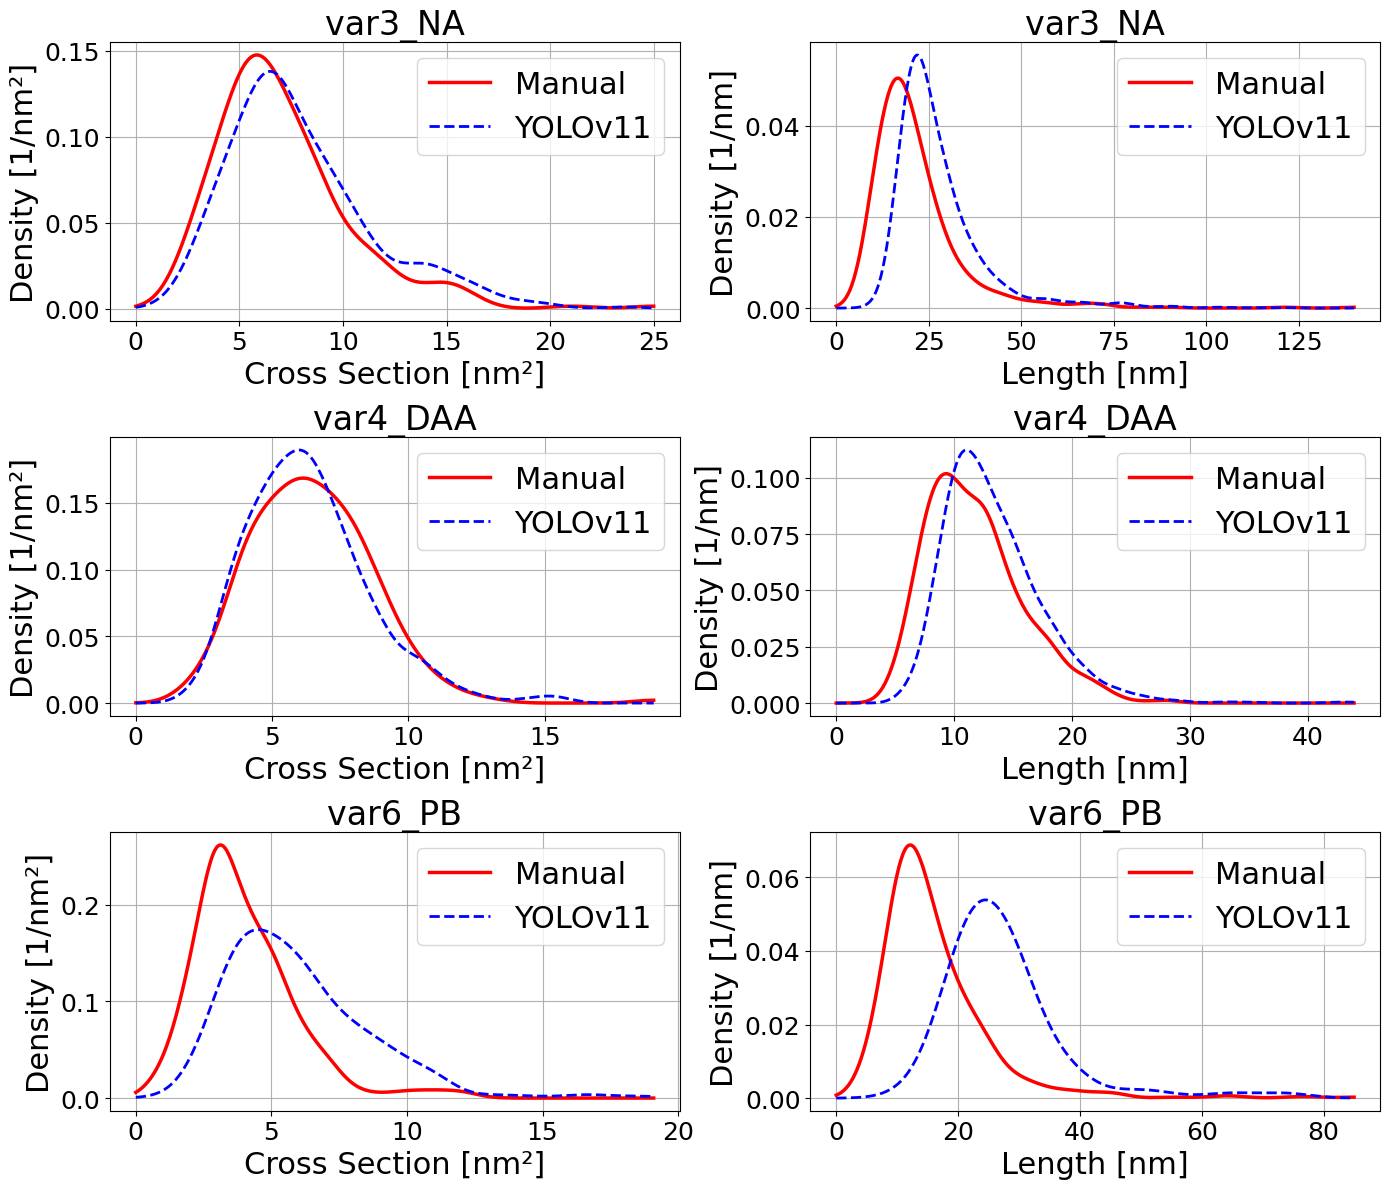

In [ ]:

def load_manual_data(filepath):
    data = pd.read_csv(filepath, header=None, engine='python', names=['integer', 'decimal'], sep=',')
    data['decimal'] = data['decimal'].fillna(0)
    data_combined = data['integer'] + data['decimal'] / (10 ** data['decimal'].astype(str).str.len())
    print('Mean: ', np.mean(np.array(data_combined.tolist())))
    print('Std: ',  np.std(np.array(data_combined.tolist())))
    return np.array(data_combined.tolist())

def load_yolo_data(cross_file, length_file):
    df_cross = pd.read_csv(cross_file)
    df_len = pd.read_csv(length_file)
    cross_vals = df_cross['Cross section [nm^2]'].dropna().values
    length_vals = df_len['Length [nm]'].dropna().values
    return cross_vals, length_vals

alloys = ['var3_NA', 'var4_DAA', 'var6_PB']

fig, axs = plt.subplots(3, 2, figsize=(14, 12))


for i, alloy in enumerate(alloys):
    manual_cross = load_manual_data(f"{alloy}_cross.csv")
    manual_length = load_manual_data(f"{alloy}_length.csv")
    yolo_cross, yolo_length = load_yolo_data(f"{alloy}_statistics_cross.csv", f"{alloy}_statistics_length.csv")
    kde_manual_cross = gaussian_kde(manual_cross)
    kde_yolo_cross = gaussian_kde(yolo_cross)
    x_vals_cross = np.linspace(0, max(np.max(manual_cross), np.max(yolo_cross)), 500)

    axs[i, 0].plot(x_vals_cross, kde_manual_cross(x_vals_cross), label="Manual", color="red", linewidth=2.5)
    axs[i, 0].plot(x_vals_cross, kde_yolo_cross(x_vals_cross), label="YOLOv11", color="blue", linestyle='--', linewidth=2)
    axs[i, 0].set_xlabel("Cross Section [nm²]", fontsize=22)
    axs[i, 0].set_ylabel("Density [1/nm²]", fontsize=22)
    axs[i, 0].set_title(f"{alloy}", fontsize=24)
    axs[i, 0].legend(fontsize=22)
    axs[i, 0].grid(True)
    axs[i, 0].tick_params(axis='both', labelsize=18)

    kde_manual_len = gaussian_kde(manual_length)
    kde_yolo_len = gaussian_kde(yolo_length)
    x_vals_len = np.linspace(0, max(np.max(manual_length), np.max(yolo_length)), 500)

    axs[i, 1].plot(x_vals_len, kde_manual_len(x_vals_len), label="Manual", color="red", linewidth=2.5)
    axs[i, 1].plot(x_vals_len, kde_yolo_len(x_vals_len), label="YOLOv11", color="blue", linestyle='--', linewidth=2)
    axs[i, 1].set_xlabel("Length [nm]", fontsize=22)
    axs[i, 1].set_ylabel("Density [1/nm]", fontsize=22)
    axs[i, 1].set_title(f"{alloy}", fontsize=24)
    axs[i, 1].legend(fontsize=22)
    axs[i, 1].grid(True)
    axs[i, 1].tick_params(axis='both', labelsize=18)

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()
